In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import dataloader
import modules 
import plots
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt

## Load in the data

See `dataloader.py` for implementation details.

In [328]:
diabetes_dataset = dataloader.DiabetesDataset(batch_size=8)

In [329]:
test_batch = next(iter(diabetes_dataset.get_dataloader(train=True)))
print(test_batch[0].shape)
print(test_batch[1].shape)

torch.Size([8, 9])
torch.Size([8, 1])


## Initialise a model

In this implementation, we can specify limited variations on our existing model architecture by passing in a list of integers specifying the shapes of the hidden layers we desire. These will be linear fully connected layers with ReLU activation and a single output node. For example:

```
network_architecture = [50, 50]
model = modules.LinearReLUMLP(network_architecture)

print(model.net)

>>>

ModuleList(
  (0): LazyLinear(in_features=0, out_features=50, bias=True)
  (1): ReLU()
  (2): LazyLinear(in_features=0, out_features=50, bias=True)
  (3): ReLU()
  (4): LazyLinear(in_features=0, out_features=1, bias=True)
)
```

In [330]:
#  a
network_architecture = [16, 4]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.015)
model.apply_initialization(torch.randn(1, 9))

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [331]:
print(model.net)

Sequential(
  (0): Linear(in_features=9, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)


## Initialise a trainer

The trainer combines our data and model and facilitates the actual training loop.

In [332]:
trainer = Trainer(max_epochs=100)
trainer.fit(model, diabetes_dataset)

Model running on cpu

 EPOCH 

Epoch 1/100, Training Loss: 27168.2607
Epoch 1/100, Validation Loss: 24590.2944

 EPOCH 

Epoch 2/100, Training Loss: 15814.5479
Epoch 2/100, Validation Loss: 7234.4743

 EPOCH 

Epoch 3/100, Training Loss: 4725.1591
Epoch 3/100, Validation Loss: 4206.1754

 EPOCH 

Epoch 4/100, Training Loss: 3829.2873
Epoch 4/100, Validation Loss: 3802.1210

 EPOCH 

Epoch 5/100, Training Loss: 3613.1302
Epoch 5/100, Validation Loss: 3581.8859

 EPOCH 

Epoch 6/100, Training Loss: 3493.9647
Epoch 6/100, Validation Loss: 3395.7508

 EPOCH 

Epoch 7/100, Training Loss: 3420.3272
Epoch 7/100, Validation Loss: 3259.8475

 EPOCH 

Epoch 8/100, Training Loss: 3324.9579
Epoch 8/100, Validation Loss: 3184.2916

 EPOCH 

Epoch 9/100, Training Loss: 3242.3528
Epoch 9/100, Validation Loss: 3121.0697

 EPOCH 

Epoch 10/100, Training Loss: 3190.0375
Epoch 10/100, Validation Loss: 3049.3750

 EPOCH 

Epoch 11/100, Training Loss: 3155.5724
Epoch 11/100, Validation Loss: 3071.5998

 EP

tensor(76.1958)
0.4934764504432678


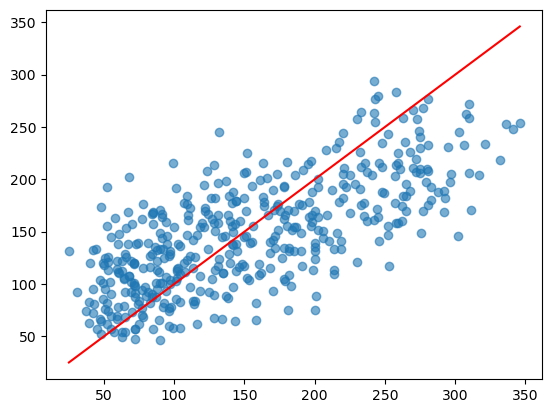

In [333]:

y = torch.tensor(diabetes_dataset.labels.astype(float), dtype=torch.float32)
y_hat = model(torch.tensor(diabetes_dataset.features.astype(float), dtype=torch.float32))

# mae 
mae = torch.mean(torch.abs(y - y_hat))
print(mae.detach())

# r-squared
r2 = r2_score(y.detach().numpy(), y_hat.detach().numpy())
print(r2)

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.scatter(y.detach().numpy(), y_hat.detach().numpy(), alpha=0.6, label='Predicted')

# add a line
ax.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Real')